In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("final_output.csv")
df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,146,216693.256255,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,53079.0,0.707117,0.193045,0.014846,0.036000,28.131469,531.0,8.1,1.9,96.260178
1,198,339110.537918,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,60969.0,0.804666,0.077669,0.008754,0.054736,32.450286,796.0,10.9,2.0,112.985603
2,122,173013.008360,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,41531.0,0.439519,0.469809,0.004084,0.059866,11.153098,398.0,17.8,4.0,27.538003
3,129,201356.450724,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,39835.0,0.737541,0.196923,0.001166,0.033194,11.913807,286.0,8.7,2.0,35.161208
4,137,220333.454690,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,45021.0,0.841546,0.013968,0.002942,0.097592,14.903610,464.0,11.5,1.8,89.763100


In [19]:
df.columns

Index(['price_sq', 'price', 'state', 'county', 'Risk_1_Type', 'Risk_1_Score',
       'Risk_2_Type', 'Risk_2_Score', 'Risk_3_Type', 'Risk_3_Score',
       'risk_score', 'risk_ratng', 'income', 'white_pct', 'black_pct',
       'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022', 'tax_trend',
       'unemp_rate', 'pop_density'],
      dtype='object')

In [ ]:
eda_df = df.drop(columns="risk_ratng")
eda_df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,146,216693.256255,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,53079.0,0.707117,0.193045,0.014846,0.036000,28.131469,531.0,8.1,1.9,96.260178
1,198,339110.537918,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,60969.0,0.804666,0.077669,0.008754,0.054736,32.450286,796.0,10.9,2.0,112.985603
2,122,173013.008360,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,41531.0,0.439519,0.469809,0.004084,0.059866,11.153098,398.0,17.8,4.0,27.538003
3,129,201356.450724,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,39835.0,0.737541,0.196923,0.001166,0.033194,11.913807,286.0,8.7,2.0,35.161208
4,137,220333.454690,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,45021.0,0.841546,0.013968,0.002942,0.097592,14.903610,464.0,11.5,1.8,89.763100


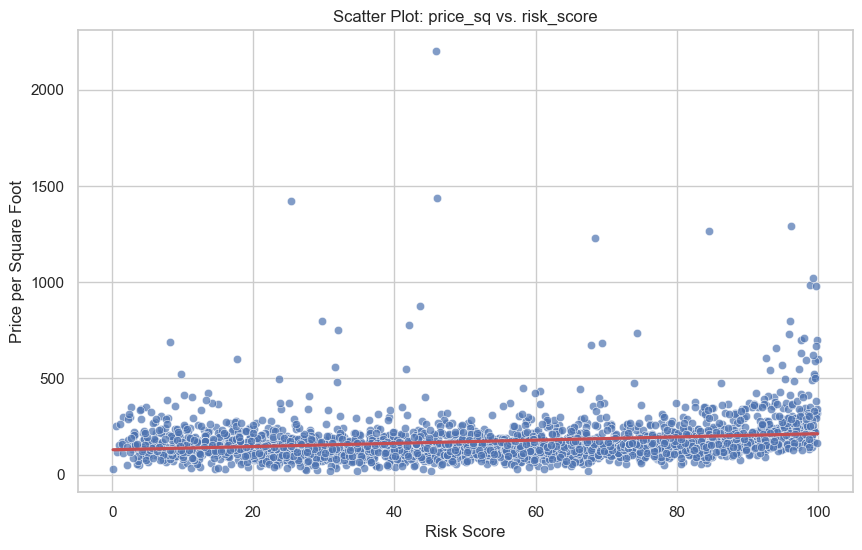

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="risk_score", y="price_sq", data=df, alpha=0.7, color="b")
sns.regplot(x="risk_score", y="price_sq", data=df, scatter=False, color="r")
plt.title("Scatter Plot: price_sq vs. risk_score")
plt.xlabel("Risk Score")
plt.ylabel("Price per Square Foot")
plt.show()

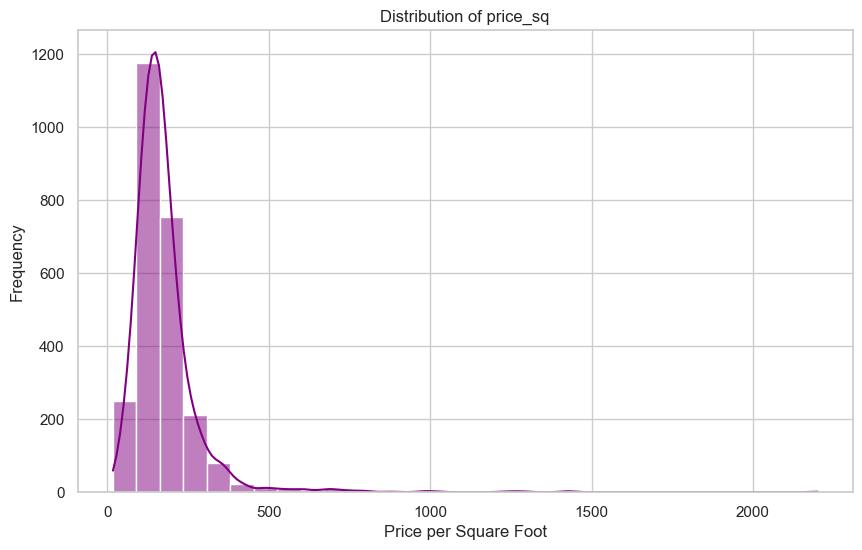

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price_sq"], kde=True, color="purple", bins=30)
plt.title("Distribution of price_sq")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

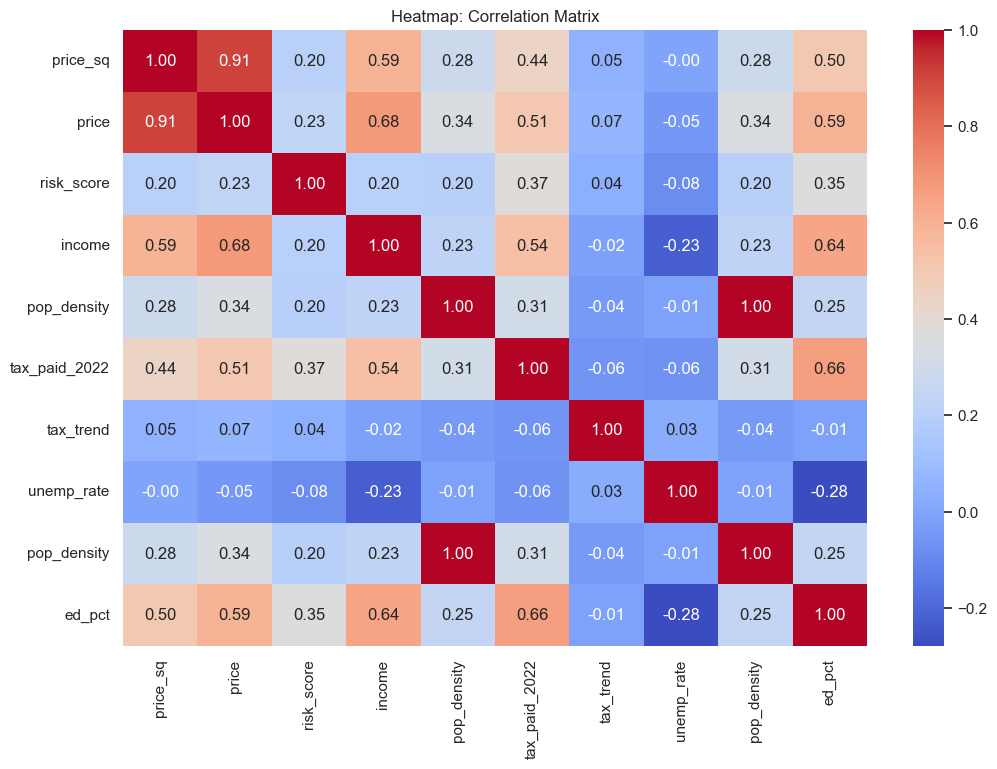

In [ ]:
plt.figure(figsize=(12, 8))
corr = df[
    [
        "price_sq",
        "price",
        "risk_score",
        "income",
        "pop_density",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
        "ed_pct",
        "white_pct",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Correlation Matrix")
plt.show()